In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
# plt.style.use("seaborn-v0_8")
plt.style.use("ggplot")
# # plt.style.use("fivethirtyeight")
# plt.style.use("dark_background")
# plt.style.use("bmh")
# plt.style.use("Solarize_Light2")


<span style="color:#e67e22; font-weight:bold">**Import Dataset From Local**</span>

In [163]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


- <span style="color:#e67e22; font-weight:bold">id</span> — Unique ID for the customer  

- <span style="color:#e67e22; font-weight:bold">Gender</span> — Gender of the customer  

- <span style="color:#e67e22; font-weight:bold">Age</span> — Age of the customer  

- <span style="color:#e67e22; font-weight:bold">Driving_License</span> —  
  - `0`: Customer does not have a driving license  
  - `1`: Customer already has a driving license  

- <span style="color:#e67e22; font-weight:bold">Region_Code</span> — Unique region code of the customer  

- <span style="color:#e67e22; font-weight:bold">Previously_Insured</span> —  
  - `1`: Customer already has vehicle insurance  
  - `0`: Customer does not have vehicle insurance  

- <span style="color:#e67e22; font-weight:bold">Vehicle_Age</span> — Age of the vehicle  

- <span style="color:#e67e22; font-weight:bold">Vehicle_Damage</span> —  
  - `1`: Customer had vehicle damage in the past  
  - `0`: No past vehicle damage  

- <span style="color:#e67e22; font-weight:bold">Annual_Premium</span> — Yearly premium amount  

- <span style="color:#e67e22; font-weight:bold">Policy_Sales_Channel</span> — Encoded outreach channel  

- <span style="color:#e67e22; font-weight:bold">Vintage</span> — Days associated with the company  

- <span style="color:#e67e22; font-weight:bold">Response</span> —  
  - `1`: Interested  
  - `0`: Not interested  


# <span style="color:#e67e22; font-weight:bold"> EDA</span>

In [164]:
# shape of data 
df.shape

(381109, 12)

In [165]:
#nulls in data 
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [166]:
#type of data in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [167]:
#5 number summary numeric,exclude "id" as its irrelevant
#exclude response as we need count, so we make it category

df["Response"] = df["Response"].astype("category")
df.drop(columns=["id"]).describe().round(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00
mean,38.82,1.00,26.39,0.46,30564.39,112.03,154.35
std,15.51,0.05,13.23,0.50,17213.16,54.20,83.67
min,20.00,0.00,0.00,0.00,2630.00,1.00,10.00
25%,25.00,1.00,15.00,0.00,24405.00,29.00,82.00
50%,36.00,1.00,28.00,0.00,31669.00,133.00,154.00
75%,49.00,1.00,35.00,1.00,39400.00,152.00,227.00
max,85.00,1.00,52.00,1.00,540165.00,163.00,299.00


In [168]:
#summary for columns with string type

df.describe(include=["object","category"])

,Gender,Vehicle_Age,Vehicle_Damage,Response
count,381109,381109,381109,381109
unique,2,3,2,2
top,Male,1-2 Year,Yes,0
freq,206089,200316,192413,334399


In [169]:
#generate a more comprehensive report
desc = df.describe(include=["object", "category"]).T
value_counts = {
    col: df[col].value_counts().to_dict()
    for col in df.select_dtypes(include=["object", "category"])
}

# print(value_counts)

desc["category_counts"] = desc.index.map(lambda col: value_counts[col])
desc


,count,unique,top,freq,category_counts
Gender,381109,2,Male,206089,"{'Male': 206089, 'Female': 175020}"
Vehicle_Age,381109,3,1-2 Year,200316,"{'1-2 Year': 200316, '< 1 Year': 164786, '> 2 Years': 16007}"
Vehicle_Damage,381109,2,Yes,192413,"{'Yes': 192413, 'No': 188696}"
Response,381109,2,0,334399,"{0: 334399, 1: 46710}"


<Axes: xlabel='Response', ylabel='count'>

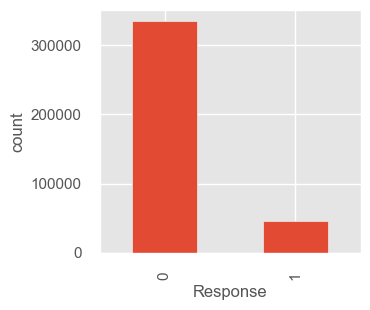

In [170]:
df.Response.value_counts().plot(kind="bar",ylabel="count",xlabel='Response',figsize=(3,3))

<Axes: xlabel='Age', ylabel='Frequency'>

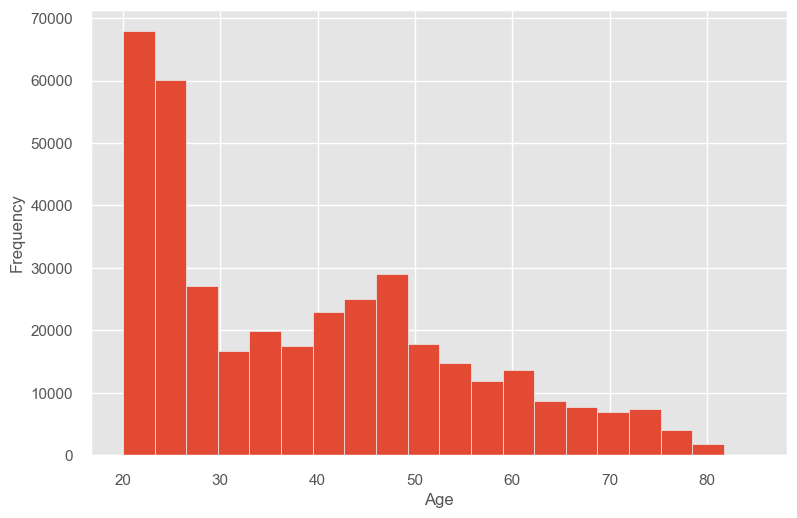

In [171]:
#distribution of age
# plt.style.use("seaborn-v0_8")
# plt.style.use("ggplot")
# # plt.style.use("fivethirtyeight")
# plt.style.use("dark_background")
# plt.style.use("bmh")
# plt.style.use("Solarize_Light2")

df["Age"].plot(kind='hist',bins=20,xlabel="Age",style="viridis")

<Axes: xlabel='Age', ylabel='Annual_Premium'>

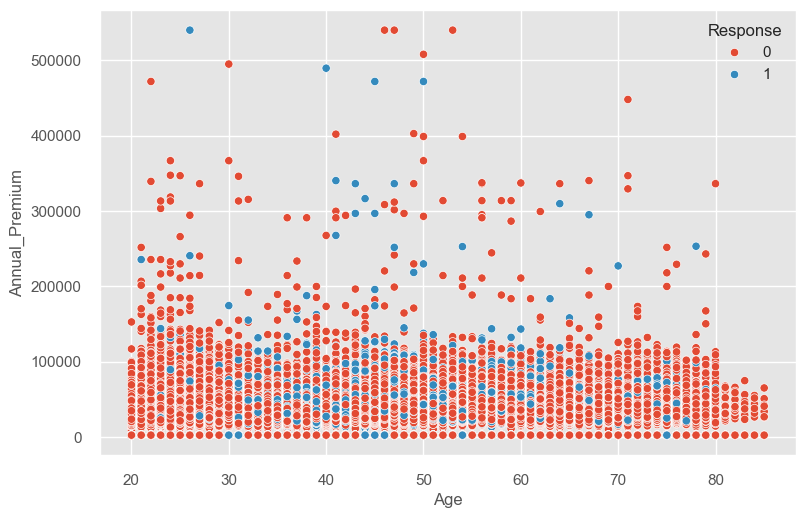

In [172]:
sns.scatterplot(x="Age",y="Annual_Premium",hue="Response",data= df)

<Axes: xlabel='Gender'>

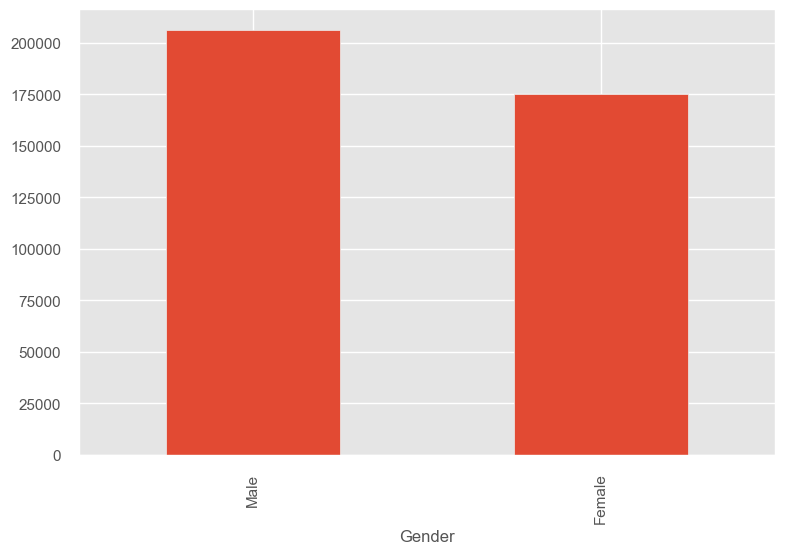

In [173]:
df["Gender"].value_counts().plot(kind="bar")

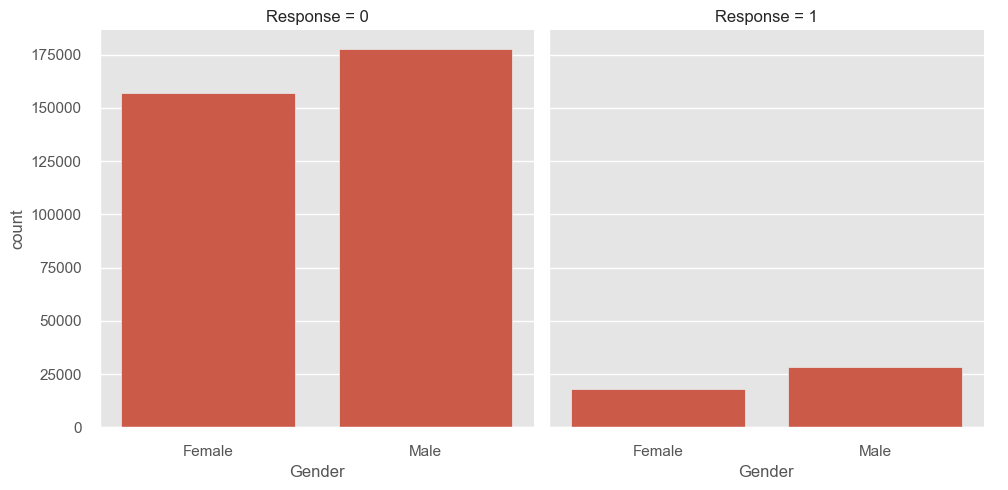

In [183]:
#Gender vs response

data = df.groupby(["Gender","Response"])["id"].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Gender",y="count",col="Response",data=data,kind="bar",)

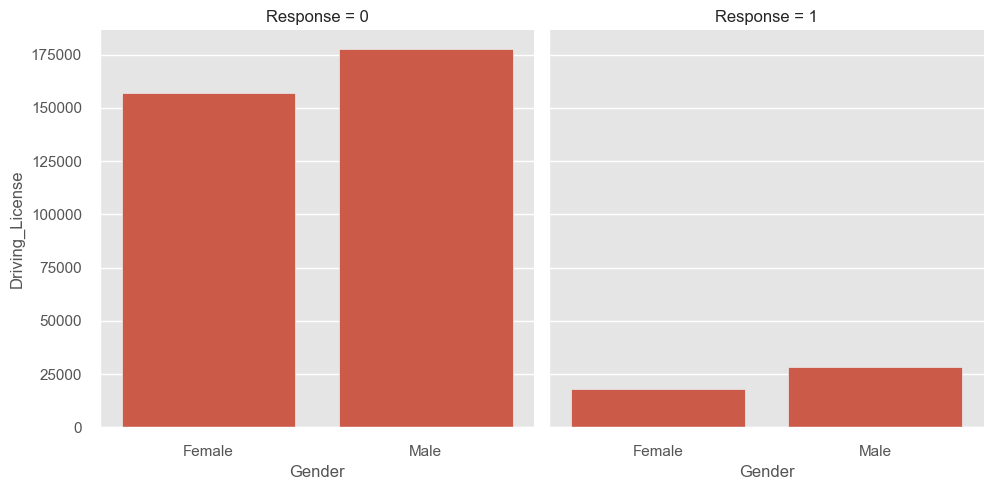

In [179]:
#driving license by gender
data = df.groupby(["Gender","Response"])[["Driving_License"]].count().reset_index()
sns.catplot(x="Gender",y="Driving_License",data=data,kind="bar",col="Response")

In [178]:

data = df.groupby(["Gender","Response"])[["Previously_Insured"]].count().reset_index()
data

,Gender,Response,Previously_Insured
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525
